Aidan Halldorson - Sub-Metric - Arrests made in Allegheny County - https://data.wprdc.org/dataset/arrest-data/resource/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f

This code reads and organizes the arrest dataset. It identifies the top 20 neighborhoods with the highest number of arrests by counting how often each neighborhood is mentioned. It also identifies the 15 neighborhoods with the lowest number of arrests. After collecting the data, the program organizes it into a readable list that shows each neighborhood’s arrest count and rank. This information provides an estimate of the overall safety of Pittsburgh neighborhoods. The input and output parameters can also be adjusted to display more than 20 results, such as the top 25, 30, or 50 neighborhoods.


Top 20 Lowest Arrest Neighborhoods:

               Neighborhood  Count
    Mt. Oliver Neighborhood      2
     Troy Hill-Herrs Island      6
            Mt. Oliver Boro     18
          Central Northside     23
              Regent Square     37
                  Ridgemont     37
              New Homestead     39
             Swisshelm Park     43
             Chartiers City     46
              East Carnegie     48
                  St. Clair     55
             Outside County     57
              Outside State     67
                Summer Hill     76
                    Oakwood     82
Golden Triangle/Civic Arena     83
                       Hays    120
               Mount Oliver    124
                    Windgap    124
                  Fairywood    127


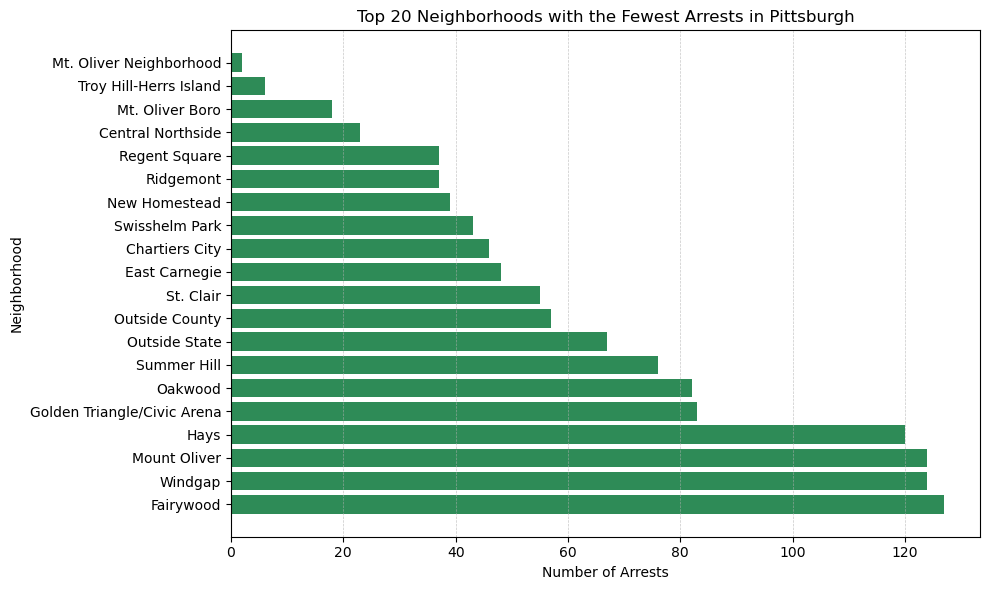

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# === Config ===
FILE_PATH = "ArrestDataSet.csv"
NEIGH_COL = "INCIDENTNEIGHBORHOOD"

def main():
    # Load Arrest Data Set
    df = pd.read_csv(FILE_PATH)

    # ---- Validate column ----
    if NEIGH_COL not in df.columns:
        raise ValueError(
            f"Column '{NEIGH_COL}' not found. Available columns: {list(df.columns)}"
        )

    # ---- Clean Neighborhood names ----
    df[NEIGH_COL] = (
        df[NEIGH_COL]
        .astype(str)
        .str.strip()
        .replace({"": pd.NA, "nan": pd.NA, "None": pd.NA})
    )

    # ---- Count arrests per neighborhood ----
    counts = (
        df[NEIGH_COL]
        .dropna()
        .value_counts()
        .rename_axis("Neighborhood")
        .reset_index(name="Count")
    )

    # ---- Get 20 neighborhoods with the fewest arrests ----
    lowest_20 = (
        counts.sort_values(["Count", "Neighborhood"], ascending=[True, True])
        .head(20)
        .reset_index(drop=True)
    )

    # ---- Display Table ----
    print("\nTop 20 Lowest Arrest Neighborhoods:\n")
    print(lowest_20.to_string(index=False))

    # ---- Create Bar Chart ----
    plt.figure(figsize=(10, 6))
    plt.barh(lowest_20["Neighborhood"], lowest_20["Count"], color="seagreen")
    plt.xlabel("Number of Arrests")
    plt.ylabel("Neighborhood")
    plt.title("Top 20 Neighborhoods with the Fewest Arrests in Pittsburgh")
    plt.gca().invert_yaxis()  # Invert for better readability (lowest at top)
    plt.grid(axis="x", linestyle="--", linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

In conclusion, the data suggests that smaller neighborhoods and those located farther from the city tend to have fewer crimes and arrests, while neighborhoods closer to downtown Pittsburgh experience higher arrest rates. This pattern may also be influenced by population differences, as neighborhoods with fewer residents naturally record fewer arrests. Therefore, the data indicates that proximity to the city and population size are correlated with arrest frequency, which means the closer and more populated a neighborhood is, the higher the number of arrests is likely to be.

Among the moderately populated neighborhoods, Regent Square and Central Northside stands out as two of the best options. They maintain a relatively low number of arrests while still being only 15–20 minutes from downtown Pittsburgh(RS) and ~5 minutes for the Central Northside, offering the advantages of city living without the higher crime rates seen in more central areas. To further determine which neighborhood is truly the best overall, it would be necessary to compare population density and calculate the median arrest rate for each neighborhood. But in comparison with the access of transportation and history of property sales, Regent Square* would be the best to maintain an affordable home, have access to public transportation, and low crime rates.